
# 머신러닝 기본기 실습 노트북 (Python)

이 노트북은 다음 내용을 **실습 중심**으로 다룹니다.

1) **[이론] 머신러닝 기본기**
- 전치 행렬, 단위 행렬, 역행렬, 미분(수치 미분)

2) **[이론] 기본 지도 학습 알고리즘들**
- 선형 회귀, 다중 선형 회귀, 다항 회귀, 로지스틱 회귀

3) **[이론] 머신러닝 더 빠르고 정확하게**
- Normalization / Standardization / Feature Scaling
- One-hot encoding
- Bias–Variance trade-off
- Regularization (L1, L2)
- Grid Search

> 실행 전: 아래 셀에서 필요 패키지를 확인하세요.


In [1]:

# 환경 점검: 필수 패키지 버전 출력
import sys, numpy, pandas, matplotlib
print("Python:", sys.version.split()[0])
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Matplotlib:", matplotlib.__version__)

# 선택: scikit-learn
try:
    import sklearn
    print("scikit-learn:", sklearn.__version__)
except Exception as e:
    print("scikit-learn 미설치 (일부 실습은 설치 필요). pip install scikit-learn 로 설치하세요.")


Python: 3.10.12
NumPy: 1.23.5
Pandas: 2.3.1
Matplotlib: 3.10.5
scikit-learn: 1.7.1



### 📚 이론: 선형대수 기초
- **전치 행렬 (Transpose)**: 행과 열을 바꾼 행렬. $A^T$
- **단위 행렬 (Identity)**: 대각선이 1이고 나머지는 0인 행렬. $I$
- **역행렬 (Inverse)**: $A^{-1}$, $A A^{-1} = I$를 만족하는 행렬. 정방행렬이고 행렬식(det)이 0이 아니어야 함.
- **수치 미분 (Numerical Derivative)**: 함수 $f(x)$의 도함수를 근사적으로 계산. 해석적으로 구하기 어려울 때 사용.



## 1. 선형대수 기초 실습
- 전치(Transpose), 단위(Identity), 역행렬(Inverse)
- 수치 미분(numerical gradient)


In [2]:

import numpy as np

# 전치, 단위, 역행렬
A = np.array([[3., 2.],
              [1., 4.]])
print("A =\n", A)
print("A^T =\n", A.T)

I = np.eye(2)
print("I =\n", I)

A_inv = np.linalg.inv(A)
print("A^{-1} =\n", A_inv)

# 검증: A * A^{-1} ≈ I
print("A @ A^{-1} =\n", A @ A_inv)

# 수치 미분: f(x) = x^2 + 3x + 1 의 도함수 f'(x) ≈ (f(x+h)-f(x-h))/(2h)
def f(x):
    return x**2 + 3*x + 1

def numerical_derivative(func, x, h=1e-6):
    return (func(x+h) - func(x-h)) / (2*h)

for x0 in [-2, 0, 2]:
    print(f"x={x0: .1f}, f'(x) 수치근사={numerical_derivative(f, x0):.6f}, 해석해 f'(x)=2x+3={2*x0+3:.6f}")


A =
 [[3. 2.]
 [1. 4.]]
A^T =
 [[3. 1.]
 [2. 4.]]
I =
 [[1. 0.]
 [0. 1.]]
A^{-1} =
 [[ 0.4 -0.2]
 [-0.1  0.3]]
A @ A^{-1} =
 [[1. 0.]
 [0. 1.]]
x=-2.0, f'(x) 수치근사=-1.000000, 해석해 f'(x)=2x+3=-1.000000
x= 0.0, f'(x) 수치근사=3.000000, 해석해 f'(x)=2x+3=3.000000
x= 2.0, f'(x) 수치근사=7.000000, 해석해 f'(x)=2x+3=7.000000



### 📚 이론: 회귀 분석 (Regression)
- **선형 회귀**: 입력 변수 $X$와 목표 변수 $y$의 관계를 직선(1차 함수)로 모델링.
- **다중 선형 회귀**: 여러 입력 변수에 대해 선형 결합으로 예측.
- **다항 회귀**: 입력 변수의 다항식 항을 추가하여 비선형 관계를 학습.
- 목표: MSE(Mean Squared Error) 최소화.



## 2. 지도학습: 회귀(Regression)

- **선형 회귀**: 1차 모델  
- **다중 선형 회귀**: 다수의 설명변수  
- **다항 회귀**: 다항 특성 변환 후 선형 모델 학습

데이터는 `sklearn.datasets.make_regression` 또는 합성 데이터로 생성합니다.


단순 선형 회귀 MSE: 271.23279985922164


/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.ca

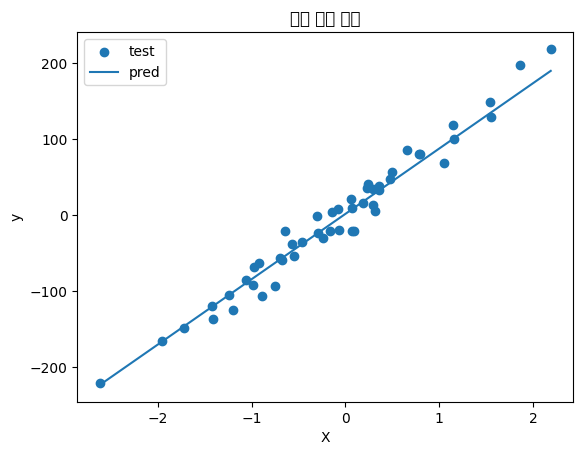

다중 선형 회귀 계수: [ 1.97135486 -1.52278315] 절편: -0.042139072127069355
다중 선형 회귀 MSE: 1.2254390040299712
다항 회귀(deg=3) MSE: 274.7189663927182


/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


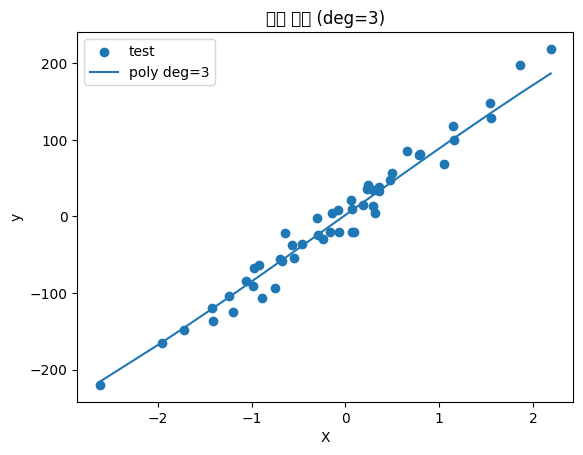

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# 2-1) 단변량 선형 회귀
X, y = make_regression(n_samples=200, n_features=1, noise=15.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin = LinearRegression().fit(X_train, y_train)
pred = lin.predict(X_test)
print("단순 선형 회귀 MSE:", mean_squared_error(y_test, pred))

# 시각화 (단일 플롯, 색상 미지정)
plt.figure()
plt.scatter(X_test, y_test, label="test")
# 정렬 후 예측선
order = np.argsort(X_test[:,0])
plt.plot(X_test[order], pred[order], label="pred")
plt.title("단순 선형 회귀")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# 2-2) 다중 선형 회귀
rng = np.random.RandomState(0)
n = 300
X_multi = np.c_[rng.uniform(-3,3,size=n), rng.uniform(0,5,size=n)]
# y = 2*x1 - 1.5*x2 + noise
y_multi = 2*X_multi[:,0] - 1.5*X_multi[:,1] + rng.normal(0, 1.0, size=n)

Xm_tr, Xm_te, ym_tr, ym_te = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)
lin_multi = LinearRegression().fit(Xm_tr, ym_tr)
print("다중 선형 회귀 계수:", lin_multi.coef_, "절편:", lin_multi.intercept_)
print("다중 선형 회귀 MSE:", mean_squared_error(ym_te, lin_multi.predict(Xm_te)))

# 2-3) 다항 회귀 (degree=3 예시)
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin", LinearRegression())
]).fit(X_train, y_train)

pred_poly = poly_model.predict(X_test)
print("다항 회귀(deg=3) MSE:", mean_squared_error(y_test, pred_poly))

plt.figure()
plt.scatter(X_test, y_test, label="test")
plt.plot(X_test[order], pred_poly[order], label="poly deg=3")
plt.title("다항 회귀 (deg=3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



### 📚 이론: 로지스틱 회귀 (Logistic Regression)
- **목적**: 이진 분류 문제에서 클래스 확률을 예측.
- 시그모이드 함수 $\sigma(z) = 1 / (1 + e^{-z})$를 사용하여 출력값을 0~1로 변환.
- 손실 함수: **이진 크로스엔트로피 (Binary Cross-Entropy)**.



## 3. 지도학습: 분류(Classification) – 로지스틱 회귀

- 이진 분류 데이터 생성 후 학습/평가


정확도: 0.8466666666666667
ROC-AUC: 0.9180444444444444


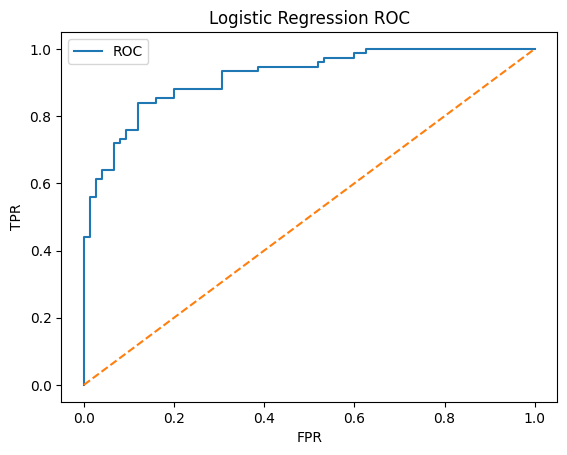

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

X_cls, y_cls = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

logr = LogisticRegression().fit(Xc_tr, yc_tr)
proba = logr.predict_proba(Xc_te)[:,1]
pred = (proba >= 0.5).astype(int)

print("정확도:", accuracy_score(yc_te, pred))
print("ROC-AUC:", roc_auc_score(yc_te, proba))

# ROC curve (단일 플롯)
fpr, tpr, th = roc_curve(yc_te, proba)
plt.figure()
plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression ROC")
plt.legend()
plt.show()



### 📚 이론: 데이터 전처리
- **Normalization**: 데이터를 0~1 범위로 스케일링 (MinMaxScaling).
- **Standardization**: 평균 0, 표준편차 1로 변환 (StandardScaler).
- **Feature Scaling**: 입력 변수의 범위를 맞춰 모델 학습 안정성 향상.
- **One-hot encoding**: 범주형 변수를 이진 벡터로 변환.



## 4. 전처리: 스케일링/정규화 & 원-핫 인코딩

- Normalization vs Standardization  
- `MinMaxScaler`, `StandardScaler`  
- `OneHotEncoder` / `pandas.get_dummies`


In [6]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# 연속형 변수 스케일링
X_demo = np.array([[1.0, 10.0],
                   [2.0, 20.0],
                   [3.0, 40.0]], dtype=float)

print("원본:\n", X_demo)

minmax = MinMaxScaler().fit_transform(X_demo)
print("MinMaxScaler:\n", minmax)

standard = StandardScaler().fit_transform(X_demo)
print("StandardScaler:\n", standard)

# 범주형 변수 One-hot
df = pd.DataFrame({
    "city": ["Seoul","Busan","Seoul","Daegu"],
    "grade": ["A","B","A","C"],
    "value": [10,20,15,12]
})
print("\n원본 DF:\n", df)

# pandas.get_dummies
dummies = pd.get_dummies(df, columns=["city","grade"], drop_first=False)
print("\npandas.get_dummies 결과:\n", dummies)

# sklearn OneHotEncoder
enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat = enc.fit_transform(df[["city","grade"]])
print("\nOneHotEncoder 결과 shape:", X_cat.shape)
print("카테고리:", enc.categories_)


원본:
 [[ 1. 10.]
 [ 2. 20.]
 [ 3. 40.]]
MinMaxScaler:
 [[0.         0.        ]
 [0.5        0.33333333]
 [1.         1.        ]]
StandardScaler:
 [[-1.22474487 -1.06904497]
 [ 0.         -0.26726124]
 [ 1.22474487  1.33630621]]

원본 DF:
     city grade  value
0  Seoul     A     10
1  Busan     B     20
2  Seoul     A     15
3  Daegu     C     12

pandas.get_dummies 결과:
    value  city_Busan  city_Daegu  city_Seoul  grade_A  grade_B  grade_C
0     10       False       False        True     True    False    False
1     20        True       False       False    False     True    False
2     15       False       False        True     True    False    False
3     12       False        True       False    False    False     True

OneHotEncoder 결과 shape: (4, 6)
카테고리: [array(['Busan', 'Daegu', 'Seoul'], dtype=object), array(['A', 'B', 'C'], dtype=object)]



### 📚 이론: Bias–Variance Trade-off
- **Bias(편향)**: 모델이 지나치게 단순하여 발생하는 오차 (과소적합).
- **Variance(분산)**: 모델이 너무 복잡하여 데이터 노이즈까지 학습하는 경향 (과적합).
- 목표: Bias와 Variance의 균형 지점 찾기.



## 5. Bias–Variance Trade-off 시각화

- 다항 차수에 따른 **훈련/검증 MSE**를 비교하여 과소적합/과적합 양상을 관찰합니다.


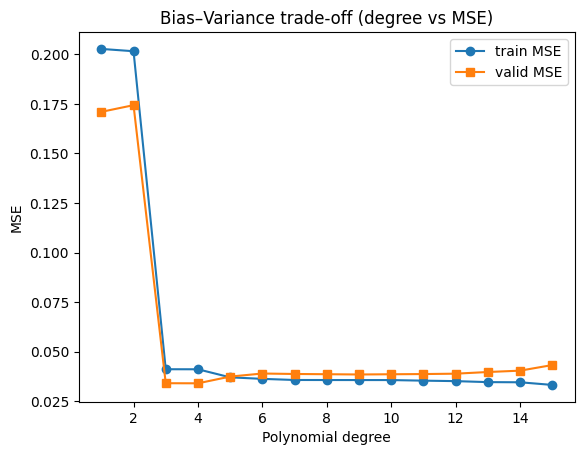

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 생성 (노이즈 포함)
rng = np.random.default_rng(0)
X = np.linspace(-3, 3, 200).reshape(-1,1)
y_true = np.sin(X).ravel()
y = y_true + rng.normal(0, 0.2, size=y_true.shape)

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.3, random_state=0)

degrees = range(1, 16)
tr_errors, va_errors = [], []

for d in degrees:
    pf = PolynomialFeatures(degree=d, include_bias=False)
    Xtr_d = pf.fit_transform(X_tr)
    Xva_d = pf.transform(X_va)
    model = LinearRegression().fit(Xtr_d, y_tr)
    tr_errors.append(mean_squared_error(y_tr, model.predict(Xtr_d)))
    va_errors.append(mean_squared_error(y_va, model.predict(Xva_d)))

plt.figure()
plt.plot(degrees, tr_errors, marker="o", label="train MSE")
plt.plot(degrees, va_errors, marker="s", label="valid MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("Bias–Variance trade-off (degree vs MSE)")
plt.legend()
plt.show()



### 📚 이론: 정규화 (Regularization)
- **목적**: 모델 복잡도를 줄여 과적합 방지.
- **L2 (Ridge)**: 계수 제곱합에 패널티 추가 → 모든 계수를 작게 만듦.
- **L1 (Lasso)**: 계수 절댓값합에 패널티 추가 → 일부 계수를 0으로 만들어 특성 선택 효과.



## 6. 정규화(Regularization): L1 vs L2

- Ridge(L2), Lasso(L1) 비교: 계수 규모/희소성, 성능


In [8]:

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=300, n_features=20, n_informative=5, noise=10.0, random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

ols = LinearRegression().fit(X_tr, y_tr)
ridge = Ridge(alpha=10.0, random_state=42).fit(X_tr, y_tr)
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000).fit(X_tr, y_tr)

for name, model in [("OLS", ols), ("Ridge", ridge), ("Lasso", lasso)]:
    mse = mean_squared_error(y_te, model.predict(X_te))
    nnz = np.sum(model.coef_ != 0)
    print(f"{name:>5} | MSE={mse:.3f} | non-zero coeffs={nnz:2d}")
    # 일부 계수 출력
print("OLS coef (앞 10개):", np.round(ols.coef_[:10], 3))
print("Ridge coef (앞 10개):", np.round(ridge.coef_[:10], 3))
print("Lasso coef (앞 10개):", np.round(lasso.coef_[:10], 3))


  OLS | MSE=155.427 | non-zero coeffs=20
Ridge | MSE=182.838 | non-zero coeffs=20
Lasso | MSE=153.421 | non-zero coeffs=17
OLS coef (앞 10개): [ 0.263  0.832 -0.52   1.034  1.118 90.037 -1.156 17.766  0.136  0.714]
Ridge coef (앞 10개): [ 0.604  0.645 -0.606  1.299  0.848 86.127 -1.015 16.25  -0.452  0.53 ]
Lasso coef (앞 10개): [ 0.159  0.663 -0.42   0.965  1.016 89.914 -1.074 17.562  0.     0.588]



### 📚 이론: 하이퍼파라미터 최적화 (Grid Search)
- **Grid Search**: 미리 정의한 파라미터 조합 전부를 탐색하여 최적 성능 찾기.
- **교차 검증 (CV)**: 데이터셋을 여러 폴드로 나누어 평균 성능 평가.



## 7. Grid Search 실습

- 파이프라인: `StandardScaler` + `Ridge`  
- 그리드 서치로 `alpha` 및 정규화 전처리 여부 탐색


In [9]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import make_regression
from sklearn.metrics import make_scorer, mean_squared_error

X, y = make_regression(n_samples=300, n_features=30, n_informative=6, noise=15.0, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

param_grid = {
    "scaler": [StandardScaler(), "passthrough"],
    "ridge__alpha": [0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=kf,
    n_jobs=None
)
grid.fit(X, y)

print("최적 파라미터:", grid.best_params_)
print("CV 최고 점수(음의 MSE):", grid.best_score_)

best_model = grid.best_estimator_
print("테스트 점수 예시(재사용 데이터):", grid.best_score_)


최적 파라미터: {'ridge__alpha': 1.0, 'scaler': 'passthrough'}
CV 최고 점수(음의 MSE): -271.253835890651
테스트 점수 예시(재사용 데이터): -271.253835890651



---

## ✍️ 실습 과제 체크리스트

1. **수치 미분** 함수로 `g(x) = sin(x) + 0.1x^3`의 도함수 값을 x ∈ {-2,0,2}에서 근사하고, 해석적 도함수와 비교하세요.  
2. 단변량 회귀에서 **다항 차수**를 1, 3, 5로 바꾸어 **MSE**를 비교하고 그래프를 겹쳐 그리세요.  
3. 로지스틱 회귀에서 **임계값(threshold)**을 0.3, 0.5, 0.7로 바꿔 **정확도/정밀도/재현율**을 비교하세요.  
4. 스케일링 없이 Ridge를 학습한 경우와 **StandardScaler**를 적용한 경우의 성능 차이를 비교하세요.  
5. Lasso의 `alpha`를 {0.01, 0.1, 1.0}로 바꾸며 **희소성(0이 아닌 계수 개수)** 변화를 관찰하세요.  
6. GridSearchCV로 `PolynomialFeatures + LinearRegression` 파이프라인에서 `degree`를 {1,2,3,4,5}로 탐색하여 **최적 차수**를 찾으세요.

> 필요 시 셀을 복사하여 자유롭게 실험하세요.
